# Варіант №23

Імпортуємо модулі

In [26]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

### Завдання 1

Для даних наведених в таблиці зробити ієрархічну кластеризацію та намалювати дендограму. Для кластеризації використовувати евклідову метрику.

In [27]:
data = np.array([
    [0, 869000, 3, 67.4, 2008],
    [3, 950000, 3, 72, 1960],
    [3, 563905, 4, 77.78, 2022],
    [4, 670000, 3, 65.1, 2013],
    [1, 442700, 3, 58.25, 2020],
    [4, 496369, 2, 41.57, 2020]
])

Малюємо дендограму

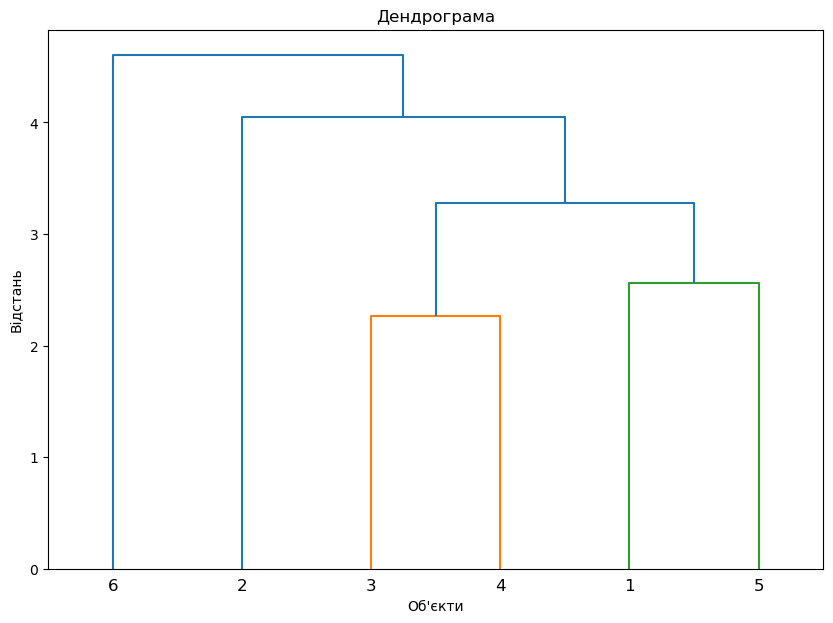

In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=np.arange(1, len(data)+1))
plt.title("Дендрограма")
plt.xlabel("Об'єкти")
plt.ylabel("Відстань")
plt.show()

### Завдання 2
Побудувати множинну регресію для даних визначених нижче. У відповіді написати рівняння регресії та R^2

In [46]:
data = pd.DataFrame([[869, 3, 67, 2008], 
                     [950, 3, 72, 1960], 
                     [564, 4, 77, 2022], 
                     [670, 3, 65, 2013], 
                     [443, 3, 58, 2020]], 
                     columns=["Y", "X1", "X2", "X3"])
data

,Y,X1,X2,X3
0,869,3,67,2008
1,950,3,72,1960
2,564,4,77,2022
3,670,3,65,2013
4,443,3,58,2020


In [47]:
X = data[["X1", "X2", "X3"]]
y = data["Y"]

In [48]:
regressor = LinearRegression()
regressor.fit(X, y)


LinearRegression()

In [51]:
y_pred = regressor.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

coefficients = regressor.coef_
intercept = regressor.intercept_
print("Рівняння регресії: Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2 + {:.2f}*X3".format(intercept, coefficients[0], coefficients[1], coefficients[2]))
print("Mean Squared Error (MSE):", mse)
print("R^2:", r2)

Рівняння регресії: Y = -3602.19 + -724.90*X1 + 44.97*X2 + 1.78*X3
Mean Squared Error (MSE): 1430.6690050494801
R^2: 0.9594717759420961
